# LogisticRegression逻辑回归
逻辑回归是一个天然的二分类的算法（也可以多分类，但不是主流操作）

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

### 逻辑回归模型
- 逻辑回归的模型其实是一个线性的模型，假设有特征$x 对应的特征就是(x_1,x_2,x_3...x_n)$ <br>
- 有特征x即有系数$\theta即(\theta_1,\theta_2...\theta_n)$ <br>
- 加上截距即$(\theta_0,\theta_1,\theta_2...\theta_n)$ <br>
- 一个线性的模型即$z = x\theta$, 其中$x = (x_0,x_1,x_2,x_3...x_n), \theta = (\theta_0,\theta_1,\theta_2...\theta_n)$ <br>
- $z = x\theta 即 z = x_0\theta_0 + x_1\theta_1 + x_2\theta_2 + x_3\theta_3...x_n\theta_n)$
- 线性模型后再加上一个S型函数（sigmoid）将其映射到0-1之间代表概率，概率趋于1的分为一类，趋于0分为第二类
- 损失函数不再是均方误差，而是交叉熵

### S型函数（sigmoid）
$sigmoid(z) = \frac{1}{1+e^{-z}}其中(z\in R,y\in (0,1))$ 

In [2]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

In [3]:
import matplotlib.pyplot as plt
x = np.linspace(-10,10,100)
y = sigmoid(x)
plt.plot(x,y)
plt.title("sigmoid(z)")
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
cancer = load_breast_cancer()
x_data = cancer.data
y_data = cancer.target

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=666666)

### 生成偏置b
操作和之前的多元线性回归一样

In [6]:
X_b = np.hstack([np.ones((len(x_train), 1)), x_train])
X_b

array([[1.000e+00, 1.167e+01, 2.002e+01, ..., 8.120e-02, 3.206e-01,
        8.950e-02],
       [1.000e+00, 1.026e+01, 1.658e+01, ..., 8.333e-02, 2.691e-01,
        9.479e-02],
       [1.000e+00, 1.230e+01, 1.590e+01, ..., 4.815e-02, 2.482e-01,
        6.306e-02],
       ...,
       [1.000e+00, 1.768e+01, 2.074e+01, ..., 1.515e-01, 2.463e-01,
        7.738e-02],
       [1.000e+00, 1.016e+01, 1.959e+01, ..., 2.232e-02, 2.262e-01,
        6.742e-02],
       [1.000e+00, 2.522e+01, 2.491e+01, ..., 2.867e-01, 2.355e-01,
        1.051e-01]])

### 生成系数 $\theta$

In [7]:
theta = np.zeros(X_b.shape[1])
theta.shape

(31,)

In [8]:
X_b.shape

(455, 31)

### 系数与特征做矩阵乘法

In [9]:
X_b.dot(theta)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### 输入到sigmoid函数中

In [10]:
print("{:.10f}".format(sigmoid(X_b.dot(theta))[0])) #得到预测结果

0.5000000000


### 逻辑回归的损失函数
逻辑回归的损失函数是交叉熵而不是均方误差 <br>
$cost = -yln(\hat{p}) - (1-y)ln(1 - \hat{p}) 其中y是真实值标签，\hat{y}是预测值$ 这个式子实际上可以被分解为： <br>
当标签即真实值y是0时：$cost = -ln(1- \hat{y})$ <br>
当标签即真实值y是1时：$cost = -ln(\hat{p})$

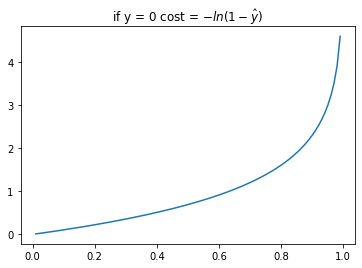

In [11]:
y_hat = np.linspace(0.01,0.99,100) #防止除0错误
y_0 = -np.log(1-y_hat)
plt.plot(y_hat,y_0)
plt.title("if y = 0 cost = $-ln(1-\hat{y})$")
plt.show()

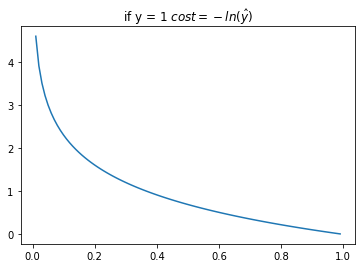

In [12]:
y_1 = -np.log(y_hat)
plt.plot(y_hat,y_1)
plt.title("if y = 1 $cost = -ln(\hat{y})$")
plt.show()

由上图可知，预测值和真实值越接近，loss就会越小，反之，预测值和真实值相差越大，loss的值就会越大。由此我们可以根据损失函数求其参数的梯度，使用梯度下降法求出其最优解<br>
### 梯度下降的优化公式
$\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m}\sum_{i = 1}^{m}(y^i - \hat{y^i})X$ <br>
$\theta = \theta - \alpha \frac{\partial J(\theta)}{\partial \theta}$

In [13]:
def J(theta):
    y_hat = sigmoid(X_b.dot(theta))
    return - np.sum(y_train*np.log(y_hat) + (1-y_train)*np.log(1-y_hat)) / len(y_train)

In [14]:
def dJ(theta):
    return X_b.T.dot(sigmoid(X_b.dot(theta)) - y_train) / len(y_train)

In [15]:
iter_num = 0
max_iter = 10000
learing_rate = 0.01
while iter_num < max_iter:
    iter_num += 1
    last_theta = theta
    theta = theta - learing_rate * dJ(theta)
    if (abs(J(theta) - J(last_theta)) < 1e-7):
        break

    

C:\Users\86189\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\86189\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\86189\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
intercept = theta[0]
coef = theta[1:]

In [17]:
intercept

0.8068911645142982

In [18]:
coef

array([ 6.02166647e+00, -4.10655926e+00,  2.73595050e+01,  3.70062504e+00,
       -3.14378478e-05, -2.70798643e-01, -4.27438837e-01, -1.68321238e-01,
        9.71276944e-03,  1.47693275e-02,  6.43508128e-02, -1.37156926e-01,
       -9.75980739e-01, -1.20388435e+01, -2.10025576e-03, -6.57702985e-02,
       -8.18162775e-02, -1.82104000e-02, -1.80423592e-02, -4.02906665e-03,
        6.31494956e+00, -1.19305900e+01,  1.98894505e+01, -8.29393584e+00,
       -5.05387073e-02, -1.01957989e+00, -1.29300104e+00, -3.33582734e-01,
       -1.94353316e-01, -6.15895411e-02])

In [19]:
y_predict = sigmoid(X_b.dot(theta))
y_predict = np.array(y_predict >= 0.5 ,dtype='int')
y_predict

C:\Users\86189\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(x_train,y_train)
lr.predict(x_train)

C:\Users\86189\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [21]:
np.sum(y_predict)

261

In [22]:
np.sum(lr.predict(x_train))

284

In [23]:
lr.intercept_

array([0.32279518])

In [24]:
lr.coef_

array([[ 1.9284945 ,  0.24316881, -0.00712762, -0.0059195 , -0.13793853,
        -0.39311481, -0.53776781, -0.28846716, -0.14894175, -0.03493732,
        -0.05125373,  1.39215666, -0.12051128, -0.09424929, -0.00853076,
         0.01170137, -0.00456801, -0.02605291, -0.04154669,  0.00463742,
         0.9747981 , -0.42879296, -0.09864078, -0.02335981, -0.25541815,
        -1.14377801, -1.34963113, -0.55422816, -0.62360221, -0.13296053]])